# few design technique
* jhgffurg
- jhwef
  - fh
  * gff
    - fh
    * hfirh
[tensorflow_playground](https://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.96668&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=regression&initZero=false&hideText=false) # this is way to add hyperlink

* below works in code cell 
'''
  bjbbjfbie
'''

### Where to find solution of errror
* stackoverflow
* tf documentation
* shift+command+space frro docstring


In [ ]:
import tensorflow as tf

# '''''''''Binary classification: steps''''''''''
- Become one with Data( visualize, visualize)
- process the data( prepare for model, the main step here is scaling/ normalization)
- create basic model called as baseline model.
- fit the model
- evaluate the model
- adjust different parameter and improve the model (increase/ improve model with respect to baseline model
- repeat untill satifactory result is achieved

* Turn all images/ data into number (neural network cant handle images)
* make sure all tensors are right shape
* scale  feature(normalize, standardlize)(neural netork prefer normalize)


## What we're going to cover

Specifically, we're going to go through the follow with TensorFlow:

- Getting a dataset to work with
- Architecture of a convolutional neural network
- A quick end-to-end example (what we're working towards)
- Steps in modelling for binary image classification with CNNs
  - Becoming one with the data
  - Preparing data for modelling
  - Creating a CNN model (starting with a baseline)
  - Fitting a model (getting it to find patterns in our data)
  - Evaluating a model
  - Improving a model
  - Making a prediction with a trained model
- Steps in modelling for multi-class image classification with CNNs
 - Same as above (but this time with a different dataset)


### Getting a dataset to work with (Data laoding and extracting)

In [ ]:
# importing data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip # !wget goes to link provided and dowmnload to google cloud i.e. on 
                                                                               # left side of colab in files
'''
  to load from any web addrress
  # ![picture](/content/pizza_steak/test/pizza/1001116.jpg)
'''

# unzipping
zip_ref=zipfile.ZipFile("pizza_steak.zip") # first small z then capital Z with capital F
zip_ref.extractall()
zip_ref.close()                                                                             

--2021-08-28 07:10:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.45.112, 142.250.81.208, 172.217.13.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.45.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   227MB/s    in 0.5s    

2021-08-28 07:10:45 (227 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



* we will work with smaller dataset to experiment quickly

In [ ]:
 # Inspect the data
"""
 A very crucial step at beginning of ML project is becoming one with the data
 In CV it mean visualizing many samples
"""
!ls pizza_steak
!ls pizza_steak/test
!ls pizza_steak/test/steak

test  train
pizza  steak
100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056

In [ ]:
# wal through pizza_steak dataset and list number of files
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print((f'there are {len(dirnames)} directory and {len(filenames)} images in {dirpath}'))

there are 2 directory and 1 images in pizza_steak
there are 2 directory and 1 images in pizza_steak/train
there are 0 directory and 750 images in pizza_steak/train/pizza
there are 0 directory and 750 images in pizza_steak/train/steak
there are 2 directory and 1 images in pizza_steak/test
there are 0 directory and 250 images in pizza_steak/test/pizza
there are 0 directory and 250 images in pizza_steak/test/steak


In [ ]:
# M-2 to know how many images are there in file directory
num_images=len(os.listdir("pizza_steak/train/steak"))
num_images

750

### Visualize

* to visualze image we will get the class names

In [ ]:
import pathlib
import numpy as np
data_dir=pathlib.Path('pizza_steak/train')
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names[:]) # this will give DS_Store also that we need to remove
print(class_names[1:])

['.DS_Store' 'pizza' 'steak']
['pizza' 'steak']


In [ ]:
# now we will visualize image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
# we will see random image each time
def random_image(target_dir, target_class):
  target_folder=target_dir+target_class

  display_random=random.sample(os.listdir(target_folder), 1)
  img=mpimg.imread(target_folder + '/' + display_random[0])
  plt.imshow(img)
  plt.title(target_class)

  print("image shape is: ", img.shape)
  return img

image shape is:  (512, 512, 3)


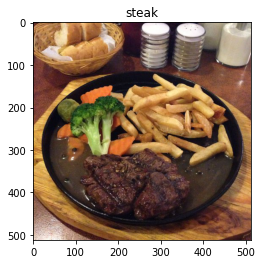

In [ ]:
img=random_image(target_dir='/content/pizza_steak/train/',
                 target_class="steak")

image shape is:  (384, 512, 3)


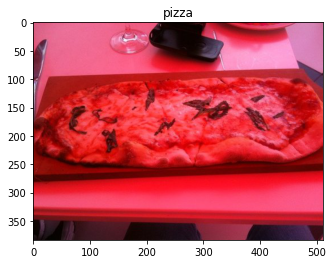

In [ ]:
img=random_image(target_dir='/content/pizza_steak/train/',
                 target_class="pizza")

image shape is:  (512, 512, 3)
image shape is:  (384, 512, 3)


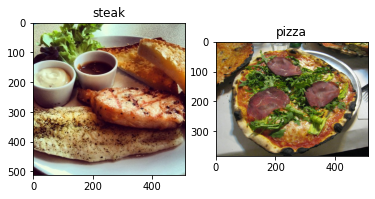

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img=random_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img=random_image('pizza_steak/train/', 'pizza')

In [ ]:
img

array([[[213,  92, 127],
        [213,  92, 127],
        [213,  92, 127],
        ...,
        [206, 111, 153],
        [205, 110, 152],
        [205, 110, 152]],

       [[212,  91, 126],
        [213,  92, 127],
        [213,  92, 127],
        ...,
        [206, 113, 157],
        [206, 111, 153],
        [206, 111, 153]],

       [[211,  91, 126],
        [211,  91, 126],
        [212,  92, 127],
        ...,
        [208, 115, 159],
        [206, 114, 155],
        [205, 113, 154]],

       ...,

       [[ 28,  19,  24],
        [ 29,  20,  25],
        [ 28,  19,  22],
        ...,
        [143,  65,  81],
        [183,  91, 112],
        [171,  73,  96]],

       [[ 26,  17,  22],
        [ 28,  19,  24],
        [ 27,  18,  23],
        ...,
        [167,  84, 102],
        [174,  79, 101],
        [178,  74,  99]],

       [[ 24,  15,  20],
        [ 26,  17,  22],
        [ 26,  17,  22],
        ...,
        [165,  82,  98],
        [173,  76,  96],
        [183,  77, 100]]

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[213,  92, 127],
        [213,  92, 127],
        [213,  92, 127],
        ...,
        [206, 111, 153],
        [205, 110, 152],
        [205, 110, 152]],

       [[212,  91, 126],
        [213,  92, 127],
        [213,  92, 127],
        ...,
        [206, 113, 157],
        [206, 111, 153],
        [206, 111, 153]],

       [[211,  91, 126],
        [211,  91, 126],
        [212,  92, 127],
        ...,
        [208, 115, 159],
        [206, 114, 155],
        [205, 113, 154]],

       ...,

       [[ 28,  19,  24],
        [ 29,  20,  25],
        [ 28,  19,  22],
        ...,
        [143,  65,  81],
        [183,  91, 112],
        [171,  73,  96]],

       [[ 26,  17,  22],
        [ 28,  19,  24],
        [ 27,  18,  23],
        ...,
        [167,  84, 102],
        [174,  79, 101],
        [178,  74,  99]],

       [[ 24,  15,  20],
        [ 26,  17,  22],
        [ 26,  17,  22],
        ...,
        [165,  82,  9

## Preprocess

### Normaize

In [ ]:
print(img/255)
print(img.shape)

[[[0.83529412 0.36078431 0.49803922]
  [0.83529412 0.36078431 0.49803922]
  [0.83529412 0.36078431 0.49803922]
  ...
  [0.80784314 0.43529412 0.6       ]
  [0.80392157 0.43137255 0.59607843]
  [0.80392157 0.43137255 0.59607843]]

 [[0.83137255 0.35686275 0.49411765]
  [0.83529412 0.36078431 0.49803922]
  [0.83529412 0.36078431 0.49803922]
  ...
  [0.80784314 0.44313725 0.61568627]
  [0.80784314 0.43529412 0.6       ]
  [0.80784314 0.43529412 0.6       ]]

 [[0.82745098 0.35686275 0.49411765]
  [0.82745098 0.35686275 0.49411765]
  [0.83137255 0.36078431 0.49803922]
  ...
  [0.81568627 0.45098039 0.62352941]
  [0.80784314 0.44705882 0.60784314]
  [0.80392157 0.44313725 0.60392157]]

 ...

 [[0.10980392 0.0745098  0.09411765]
  [0.11372549 0.07843137 0.09803922]
  [0.10980392 0.0745098  0.08627451]
  ...
  [0.56078431 0.25490196 0.31764706]
  [0.71764706 0.35686275 0.43921569]
  [0.67058824 0.28627451 0.37647059]]

 [[0.10196078 0.06666667 0.08627451]
  [0.10980392 0.0745098  0.09411765]


### CNN model

**We build CNN to find pattern in our image**
**Steps**:
- laod img
-preprocess data
-Build cnn architect
-compile our CNN
-Fit the CNN


In [ ]:
# preprocessing data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# setting seed
tf.random.set_seed(42)

# process data
train_datagen=ImageDataGenerator(rescale=1./255) # its rescale and not reshape
valid_datagen=ImageDataGenerator(rescale=1./255) # its rescale and not reshape

# setup path
train_dir='/content/pizza_steak/train'
test_dir='pizza_steak/test'

# Import data frrom directory and turn it into batches
# training on 10,000 or more images at a time might not fit into the memory of GPU. therefore not able to learn very well 
train_data=train_datagen.flow_from_directory(directory=train_dir,  # remember to use flow_from_directory
                                             batch_size=32,
                                             target_size=(224, 224),
                                             class_mode='binary'
                                             )
valid_data=valid_datagen.flow_from_directory(directory=test_dir, # remember to use flow_from_directory
                         batch_size=32,
                         target_size=(224, 224),
                         class_mode='binary',
                         seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# get a sample of next data batch
images, labels=train_data.next()
print(len(images)) 
print(len(labels)) 
print(len(train_data)) # always shoe roundoff data. 

32
32
47


In [ ]:
# Rescaled images
images.shape

(32, 224, 224, 3)

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
labels

array([0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
# Build CNN model
# same as tiny Vgg on CNN explainer website
model_1=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters=10,
                             kernel_size=3,
                             activation='relu',
                             input_shape=(224, 224, 3)),
      tf.keras.layers.Conv2D(filters=10,
                             kernel_size=3,
                             activation='relu',
                             input_shape=(224, 224, 3)),
      tf.keras.layers.MaxPool2D(pool_size=2,
                                padding='valid'),
      tf.keras.layers.Conv2D(filters=10,
                             kernel_size=3,
                             activation='relu'),
      tf.keras.layers.Conv2D(filters=10,
                             kernel_size=3,
                             activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=2,
                                padding='valid'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, activation='sigmoid')

])

model_1.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

#checking the length of training and testing data
len(train_data), len(valid_data)

# fitting the model
history_1=model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data)
            )

Epoch 1/5
47/47 [==============================] - 99s 2s/step - loss: 0.5931 - accuracy: 0.6753 - val_loss: 0.4814 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 96s 2s/step - loss: 0.4378 - accuracy: 0.8047 - val_loss: 0.3544 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 96s 2s/step - loss: 0.4085 - accuracy: 0.8293 - val_loss: 0.3610 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 97s 2s/step - loss: 0.3894 - accuracy: 0.8380 - val_loss: 0.3887 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 97s 2s/step - loss: 0.3155 - accuracy: 0.8680 - val_loss: 0.3179 - val_accuracy: 0.8420


- Here we are getting accuracy as 88%, hence to improve the model we can include conv2D layers and maxpool layers and change hyperparameter for better results.


### Evaluate the model

In [ ]:
model_1.evaluate(valid_data)

16/16 [==============================] - 10s 633ms/step - loss: 0.3179 - accuracy: 0.8420


[0.31793642044067383, 0.8420000076293945]

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# setting seed
tf.random.set_seed(42)

# process data
train_datagen=ImageDataGenerator(rescale=1./255) # its rescale and not reshape
valid_datagen=ImageDataGenerator(rescale=1./255) # its rescale and not reshape

# setup path
train_dir='/content/pizza_steak/train'
test_dir='pizza_steak/test'

# Import data frrom directory and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir, # remember to use flow_from_directory
                         batch_size=32,
                         target_size=(224, 224),
                         class_mode='binary',
                         seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# we can add activation function seperately also
tf.keras.layers.Conv2D(filters=10,
                             kernel_size=3),
tf.keras.layers.Activation(tf.nn.relu)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                             tf.keras.layers.Dense(4, activation='relu'),
                             tf.keras.layers.Dense(4, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])
model_2.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

model_2.fit(train_data, validation_data=valid_data, epochs=5, steps_per_epoch=len(train_data), validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 229ms/step - loss: 1.1351 - accuracy: 0.5227 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 222ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 223ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
w=model_2.weights # model.weights give weight and bias but here bias is 0.
w

[<tf.Variable 'dense_4/kernel:0' shape=(150528, 4) dtype=float32, numpy=
 array([[ 0.00807995, -0.0047603 , -0.00785746, -0.00662824],
        [ 0.00011287, -0.00173259, -0.00296339, -0.00160977],
        [ 0.00254405, -0.00746276, -0.0083858 , -0.00372902],
        ...,
        [-0.00719826, -0.00247422, -0.00758689, -0.00211407],
        [-0.00082392, -0.00266059,  0.01123585, -0.01237857],
        [-0.01202544, -0.00101033, -0.00345776, -0.00903971]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([-0.00600377, -0.00364287, -0.00600409, -0.00642218], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.33143887, -0.03288092,  0.74050254, -0.42322624],
        [ 0.40493456,  0.6845091 ,  0.76923865,  0.4272991 ],
        [-0.2670718 ,  0.07572356, -0.40690976,  0.34780696],
        [-0.6528584 ,  0.06640585,  0.36616015,  0.64350015]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape

we can use some of the classification evaluation metrics like:
- accuracy, 
- precision, 
- Recall, 
- F1-score, 
- confusion matrix

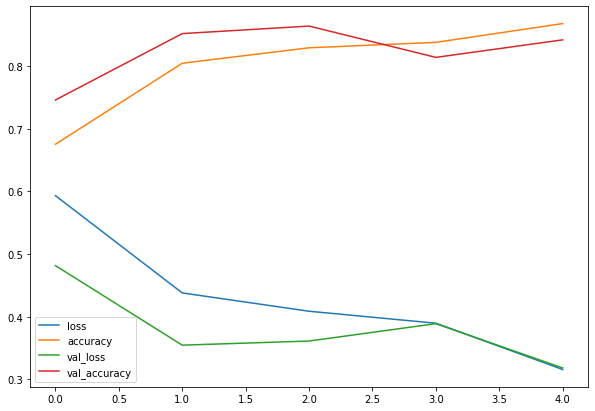

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7))

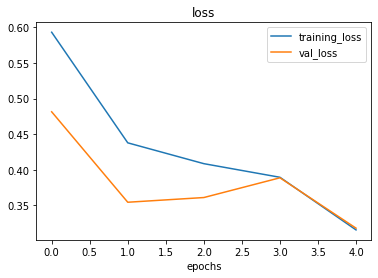

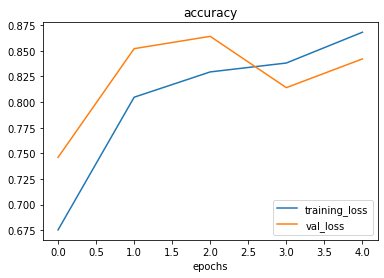

In [ ]:
# plotting training and validtion curve seperately
def plot_loss_curves(history):
  '''
  Returns sepearte loss curves for training and validation metrics
  '''
  loss=history_1.history['loss']
  val_loss=history_1.history['val_loss']

  accuracy=history_1.history['accuracy']
  val_accuracy=history_1.history['val_accuracy']

  epochs= range(len(history_1.history['loss'])) # how many epochs 

  # plotting loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # ploting accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_loss')
  plt.plot(epochs, val_accuracy, label='val_loss')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

plot_loss_curves(history_1)

when val_loss starts to increase we can say that model is overfitting.

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28090)            

[Tensorflow playground](https://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.96668&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=regression&initZero=false&hideText=false)
You can use hyperlink as [text](link)

Despite having 20x trainable parameter than CNN(model1), model_2 perfoems terribly 
lets try to improve the modedl_2

updating modedl_2 i.e. increasing input shape of dense layer by 25 times i.e. 100.
we  can try running the model. we will observe that accuracy increased from 50 to 74 and trainable parameter to 500 times.

This is because CNN learn important pattern only from the image and model_2 i.e. simple NN learnt all pattern therefore more trainable parameter.

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



Fitting the model comes in 3 steps:
- create baseline 
- beat baseline
- reduce overfitting

ways to induce overfitting:
- increase the nuber of conv layers
- increase the number of conv filters
- add another dense layer to output of flattered layer

Reduce overfitting:
- add data augumentation
- add regularization alyer (such as MaxPool2D)
- add more data and better data
- use transfer learning

> 🔑**Note: ** Reducing overfitting is also known as regularization


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# setting seed
tf.random.set_seed(42)

# process data
train_datagen=ImageDataGenerator(rescale=1./255) # its rescale and not reshape
valid_datagen=ImageDataGenerator(rescale=1./255) # its rescale and not reshape

# setup path
train_dir='/content/pizza_steak/train'
test_dir='pizza_steak/test'

# Import data frrom directory and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir, # remember to use flow_from_directory
                         batch_size=32,
                         target_size=(224, 224),
                         class_mode='binary',
                         seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation 
# create the model
model_3=tf.keras.Sequential([
        tf.keras.layers.Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
        MaxPool2D(pool_size=2), # size=2 will take 2x2 matrics from image and max of the element will be taken frrom them, thereore reducing size of image to half.
        Conv2D(10,3, activation='relu'),
        MaxPool2D(), # only first time we need to define input shape in Conv2D and first time pool size in MMaxPool2Dc
        Conv2D(10,3, activation='relu'),
        MaxPool2D(),
        Flatten(),
        Dense(1, activation='sigmoid')

])

In [ ]:
model_3.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 51s 1s/step - loss: 0.6028 - accuracy: 0.6793 - val_loss: 0.4925 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 50s 1s/step - loss: 0.4740 - accuracy: 0.7840 - val_loss: 0.3942 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 50s 1s/step - loss: 0.4274 - accuracy: 0.8073 - val_loss: 0.3453 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 50s 1s/step - loss: 0.3934 - accuracy: 0.8327 - val_loss: 0.3425 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 50s 1s/step - loss: 0.3953 - accuracy: 0.8233 - val_loss: 0.3357 - val_accuracy: 0.8540


In [ ]:
# getting a summary
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6760)             

### opening our bags of tricks and fining data augumentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create Image data generator training instance with data augumentation
train_datagen_augumented=ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            shear_range=0.2, # how much you want to shear an image 
                                            zoom_range=0.2, # zoom in randomly on an image
                                            width_shift_range=0.2, # move image around x-axis
                                            height_shift_range=0.3,# move image around y-axis
                                            horizontal_flip=True # flipping and image
                                            )

# create ImageDataGenerator without data augumentation
train_datagen=ImageDataGenerator(rescale=1/255.)

# create ImageDataGenerator without data augumentation for the test dataset
test_datagen=ImageDataGenerator(rescale=1/255.)
                                
# data augumentation allow our model to learn more generalized pattern by rotatinng and flipping

### lets visualize what data augumentation do

In [ ]:
import tensorflow as tf

In [ ]:
# import data and augument it from training directory
print('augumented data')
train_data_augumented=train_datagen_augumented.flow_from_directory(train_dir,
                                                                target_size=(224,224),
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                shuffle=False)

# create non-augumented data batches
print('non-augumented training data:')
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=False)

IMG_SIZE=(224,224)
#create non-augumented test data batches
print('Non-augumented test data:')
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=IMG_SIZE,
                                           batch_size=32,
                                           class_mode='binary')

augumented data
Found 1500 images belonging to 2 classes.
non-augumented training data:
Found 1500 images belonging to 2 classes.
Non-augumented test data:
Found 500 images belonging to 2 classes.


- Data augumentation is usually performed on training data. usinng `ImageDataGenerator` built in data augumentation parameter our image are left as they are in dir but are modified as they are loaded into the model. 

- Finally lets visualize some augumented data

In [ ]:
images, data=train_data.next()
augu_images, augu_labels=train_data_augumented.next() # labels aren't augumented only image

showing random image: 24


(-0.5, 223.5, 223.5, -0.5)

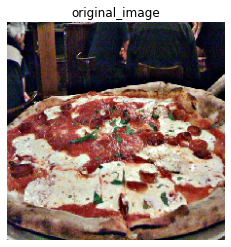

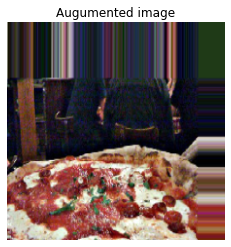

In [ ]:
# showing original image and augumented iamge
import random
import matplotlib.pyplot as plt
random_number=random.randint(0,31) # our batch size is 32...
print(f'showing random image: {random_number}')
plt.imshow(images[random_number])
plt.title(f'original_image')
plt.axis(False)
plt.figure()
plt.imshow(augu_images[random_number])
plt.title(f'Augumented image')
plt.axis(False)

In [ ]:
# creating same model:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model_5=Sequential([
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(pool_size=2),
        Conv2D(10,3, activation='relu'),
        MaxPool2D(),
        Conv2D(10, 3,activation='relu'),
        MaxPool2D(),
        Flatten(),
        Dense(1, activation='sigmoid')
])

# compiling model
model_5.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

history_5=model_5.fit(train_data_augumented, # fitting mdoel_5 on augumented data
                     epochs=5,
                     steps_per_epoch=len(train_data_augumented),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 570ms/step - loss: 0.7278 - accuracy: 0.4287 - val_loss: 0.6930 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 27s 570ms/step - loss: 0.6933 - accuracy: 0.4647 - val_loss: 0.6927 - val_accuracy: 0.4960
Epoch 3/5
47/47 [==============================] - 27s 572ms/step - loss: 0.6931 - accuracy: 0.4980 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 27s 570ms/step - loss: 0.6927 - accuracy: 0.5060 - val_loss: 0.6848 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 27s 572ms/step - loss: 0.6984 - accuracy: 0.5100 - val_loss: 0.6912 - val_accuracy: 0.5700


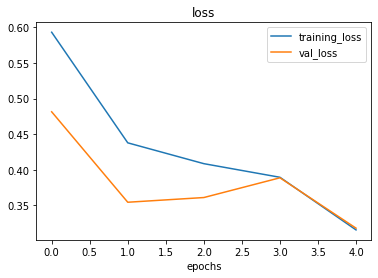

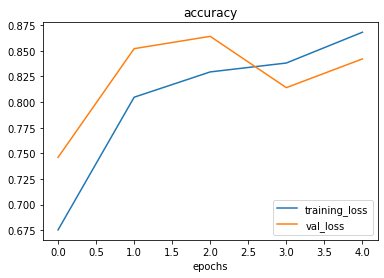

In [ ]:
plot_loss_curves(history_5)
# plt.show()

- Data augumentation does not changes training data. training data remains the same.
- this may be the case of underfitting where we made model complex by adding data augumentation therefore making it hard for model to learn.
- Now we can start with changing parameter
- Firstly we can try with shuffle and we declared shuffle as false we can try chaging shuffle as true.

In [ ]:
# lets shuffle and see result


# import data and augument it from training directory
print('augumented data')
train_data_augumented=train_datagen_augumented.flow_from_directory(train_dir,
                                                                target_size=(224,224),
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                shuffle=True)

# create non-augumented data batches
print('non-augumented training data:')
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=True
                                             )

IMG_SIZE=(224,224)
#create non-augumented test data batches
print('Non-augumented test data:')
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=IMG_SIZE,
                                           batch_size=32,
                                           class_mode='binary')


# creating same model:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model_5=Sequential([
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(pool_size=2),
        Conv2D(10,3, activation='relu'),
        MaxPool2D(),
        Conv2D(10, 3,activation='relu'),
        MaxPool2D(),
        Flatten(),
        Dense(1, activation='sigmoid')
])

# compiling model
model_5.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

history_5=model_5.fit(train_data_augumented, # fitting mdoel_5 on augumented data
                     epochs=5,
                     steps_per_epoch=len(train_data_augumented),
                     validation_data=test_data,
                     validation_steps=len(test_data))

augumented data
Found 1500 images belonging to 2 classes.
non-augumented training data:
Found 1500 images belonging to 2 classes.
Non-augumented test data:
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 27s 571ms/step - loss: 0.6699 - accuracy: 0.5840 - val_loss: 0.5370 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 27s 568ms/step - loss: 0.5637 - accuracy: 0.7187 - val_loss: 0.4529 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 27s 571ms/step - loss: 0.5386 - accuracy: 0.7280 - val_loss: 0.3908 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 27s 572ms/step - loss: 0.5010 - accuracy: 0.7673 - val_loss: 0.3646 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 27s 573ms/step - loss: 0.4914 - accuracy: 0.7713 - val_loss: 0.4128 - val_accuracy: 0.8200


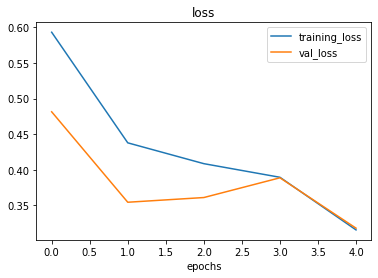

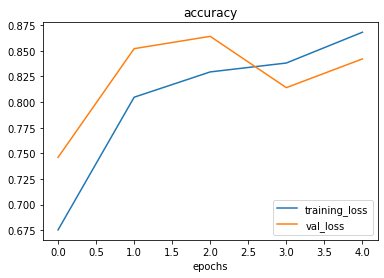

In [ ]:
plot_loss_curves(history_5)

- similarly we can try for many other things and see the reuslt
- repeat the steps and repeat untill satisfied.

#### common ways to improve a deep model: basically called as `hyper-parameter` tunning
- adding the layers (conv2D, MaxPool2D)
- incraese the number of filters in each conv2D layers (from 10 to 32 or 64) 
- increase number of hidden layers
- change the activation fuctions
- change the optimization function
- change the learning rate
- fitting on more data
- fitting for longer (incraesing number of epochs)
- we can also use tranfer learning to leaveragee what other model has learned and adjust it for our own use

### making prediction with our trained model on our own custom data

In [ ]:
# to print classes we are dealing with
import numpy as np
import pathlib
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names=class_names[1:]
print(class_names)
# !wget [link] ; to print any image from google

['pizza' 'steak']


### viewing random image/ example we are testing on

--2021-08-27 07:45:47--  https://hips.hearstapps.com/del.h-cdn.co/assets/18/08/1519155106-flank-steak-horizontal.jpg?resize=980:*
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95942 (94K) [image/jpeg]
Saving to: ‘1519155106-flank-steak-horizontal.jpg?resize=980:*’

1519155106-flank-st 100%[===================>]  93.69K  --.-KB/s    in 0.01s   

2021-08-27 07:45:47 (6.76 MB/s) - ‘1519155106-flank-steak-horizontal.jpg?resize=980:*’ saved [95942/95942]



(-0.5, 979.5, 652.5, -0.5)

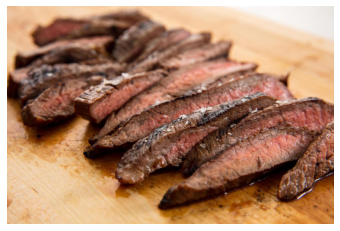

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://hips.hearstapps.com/del.h-cdn.co/assets/18/08/1519155106-flank-steak-horizontal.jpg?resize=980:*      # (link to be pasted)
steak=mpimg.imread('1519155106-flank-steak-horizontal.jpg?resize=980:*')
plt.imshow(steak)
plt.axis(False)

🔑**Note:** when we train neurual network and we want to make prediction with it on custom data. its important that custom ata is preprocessed same as data our model is trained 

In [ ]:
print(steak.shape) # shows 3dimen only as height, width and color channel but we also want batch size then we need to expand the size  
expanded_steak=tf.expand_dims(steak, axis=0).shape
print(expanded_steak)
# print(model_5.predict(tf.expand_dims(expanded_steak)))

print(steak)

(653, 980, 3)
(1, 653, 980, 3)
[[[227 182 141]
  [228 183 142]
  [228 183 141]
  ...
  [230 227 222]
  [230 227 222]
  [230 227 222]]

 [[228 183 142]
  [228 183 142]
  [228 183 142]
  ...
  [231 228 223]
  [230 227 222]
  [230 227 222]]

 [[229 184 143]
  [229 184 143]
  [229 184 143]
  ...
  [231 228 223]
  [231 228 223]
  [230 227 222]]

 ...

 [[229 178 123]
  [228 177 122]
  [225 174 121]
  ...
  [209 140  65]
  [209 140  65]
  [209 140  65]]

 [[233 181 121]
  [231 179 121]
  [226 174 117]
  ...
  [208 140  67]
  [208 140  67]
  [208 140  67]]

 [[236 182 118]
  [234 180 118]
  [227 175 115]
  ...
  [208 140  69]
  [208 140  69]
  [208 140  69]]]


In [ ]:
# create a helper function to import and load and resize it to be able to be used with 
def load_and_pre_image(filename, img_shape=224):
  '''
  read an image from filename, turn it into tensor and reshape it to (img_shape, img_shape, color channel).
  '''
  # read the image 
  img=tf.io.read_file(filename)
  # dcode the read file into tensors
  img=tf.image.decode_image(img)
  # resize the image
  img=tf.image.resize(img, size=[img_shape, img_shape])
  # rescale image and get all values between 0-1
  img=img/255.
  return img

In [ ]:
steak=load_and_pre_image("1519155106-flank-steak-horizontal.jpg?resize=980:*")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.8927778 , 0.7163072 , 0.55160135],
        [0.90571606, 0.72140235, 0.54885334],
        [0.91208255, 0.72384727, 0.5434551 ],
        ...,
        [0.9019608 , 0.8980392 , 0.8784314 ],
        [0.8982843 , 0.89436275, 0.8747549 ],
        [0.89411765, 0.8901961 , 0.87058824]],

       [[0.8980392 , 0.7284138 , 0.5638639 ],
        [0.90659523, 0.72912675, 0.5644209 ],
        [0.909305  , 0.72499126, 0.55244225],
        ...,
        [0.9019608 , 0.8980392 , 0.8784314 ],
        [0.8982843 , 0.89436275, 0.8747549 ],
        [0.8980392 , 0.89411765, 0.8745098 ]],

       [[0.90588236, 0.73333335, 0.5803922 ],
        [0.9139186 , 0.737448  , 0.5824574 ],
        [0.9212048 , 0.73515296, 0.57392335],
        ...,
        [0.9019608 , 0.8980392 , 0.8784314 ],
        [0.8982843 , 0.89436275, 0.8747549 ],
        [0.9017009 , 0.89777935, 0.8781715 ]],

       ...,

       [[0.8822279 , 0.7134228 , 0.548457  ],
        [0.90

In [ ]:
pred=model_5.predict(tf.expand_dims(steak, axis=0)) # this will give prediction probability and not class name
pred

array([[0.83961034]], dtype=float32)

🔑 in case it give 0.98772446 as prob than as it is value greater than `0.5` therefore we wil consider as class 1.
- here we are dealinng with binary classification so 
  - class 0 = pizza
  - class 1 = steak

In [ ]:
# we will now converrt to give class_name instead of prob.
pred_class=class_names[int(tf.round(pred))]
pred_class 

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  '''
  import an image located at filename, makes prediction with model and plot the
  image with the predicted class as the title
  '''
  # import the target image and preprocess it
  img=load_and_pre_image(filename)

  # make prediction
  pred=model.predict(tf.expand_dims(img, axis=0))

  # get the predicted class
  pred_class=class_names[int(tf.round(pred))]

  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f'prediction: {pred_class}')
  plt.axis(False)

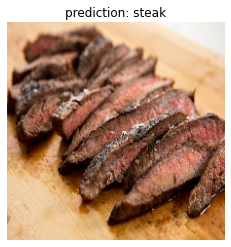

In [ ]:
pred_and_plot(model_5, '1519155106-flank-steak-horizontal.jpg?resize=980:*')

- similarily we can preddic for any random image.

# '''''''''Multi-class CNN'''''''''''


## What we're going to cover

Specifically, we're going to go through the follow with TensorFlow:

- Getting a dataset to work with
- Architecture of a convolutional neural network
- A quick end-to-end example (what we're working towards)
- Steps in modelling for binary image classification with CNNs
  - Becoming one with the data
  - Preparing data for modelling
  - Creating a CNN model (starting with a baseline)
  - Fitting a model (getting it to find patterns in our data)
  - Evaluating a model
  - Improving a model
  - Making a prediction with a trained model
- Steps in modelling for multi-class image classification with CNNs
 - Same as above (but this time with a different dataset)


In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
# this data is same as food_101 data on kaggle

# unziping the file
zip_ref=zipfile.ZipFile('/content/10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2021-08-30 08:53:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 173.194.74.128, 172.217.219.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   175MB/s    in 2.8s    

2021-08-30 08:54:00 (175 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print((f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}'))

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 10 directories and 0 images in 10_fo

In [ ]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Aug 30 05:54 .
drwxr-xr-x  1 root root 4096 Aug 30 05:54 ..
drwxr-xr-x 12 root root 4096 Aug 30 05:54 test
drwxr-xr-x 12 root root 4096 Aug 30 05:54 train


In [2]:
# setup path
train_dir='10_food_classes_all_data/train/'
test_dir='10_food_classes_all_data/test/'

In [3]:
# visualize visualize visualize
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names[:]) # this will give DS_Store also that we need to remove
print(class_names[1:])

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']
['chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger' 'ice_cream'
 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
import random
random.choice(class_names)

'ice_cream'

In [ ]:
# now we will visualize image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
# we will see random image each time
def random_image(target_dir, target_class):
  target_folder=target_dir+target_class

  display_random=random.sample(os.listdir(target_folder), 1)
  img=mpimg.imread(target_folder + '/' + display_random[0])
  plt.imshow(img)
  plt.title(target_class)

  print("image shape is: ", img.shape)
  return img

image shape is:  (384, 512, 3)


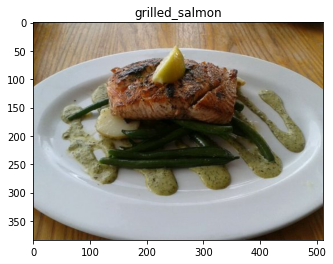

In [ ]:
img=random_image(target_dir=train_dir,
                 target_class=random.choice(class_names))

In [4]:
# only change here will be the file names and cass_mode

# preprocessing data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# setting seed
tf.random.set_seed(42)

# process data
train_datagen=ImageDataGenerator(rescale=1./255) # its rescale and not reshape
test_datagen=ImageDataGenerator(rescale=1./255) # its rescale and not reshape

# Import data frrom directory and turn it into batches
# training on 10,000 or more images at a time might not fit into the memory of GPU. therefore not able to learn very well 
train_data=train_datagen.flow_from_directory(directory=train_dir,  # remember to use flow_from_directory
                                             batch_size=32,
                                             target_size=(224, 224),
                                             class_mode='categorical'
                                             )
test_data=test_datagen.flow_from_directory(directory=test_dir, # remember to use flow_from_directory
                         batch_size=32,
                         target_size=(224, 224),
                         class_mode='categorical',
                         seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# Here the architecture is different from that of binary as here 2 conv2D layers followed by MaxPool2D
# here dense = 10 while in binary dense = 1
model_6=Sequential([
        Conv2D(10, 3, input_shape=(224, 224, 3), activation='relu'),
        Conv2D(10,3, activation='relu'),
        MaxPool2D(),
        Conv2D(10, 3,activation='relu'),
        Conv2D(10, 3,activation='relu'),
        MaxPool2D(),
        Flatten(),
        Dense(10, activation='softmax') # here dense is 10 as we have 10 casesa nd in binanry we used to
                                        # dense=1
])

# compiling model
model_6.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history_6=model_6.fit(train_data, # fitting mdoel_5 on augumented data
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=len(test_data))
                     # we can also try for validation_data=int(0.25*len(test_data))

Epoch 1/5
235/235 [==============================] - 87s 243ms/step - loss: 2.1416 - accuracy: 0.2099 - val_loss: 2.0166 - val_accuracy: 0.2676
Epoch 2/5
235/235 [==============================] - 56s 237ms/step - loss: 1.9244 - accuracy: 0.3315 - val_loss: 1.9979 - val_accuracy: 0.3024
Epoch 3/5
235/235 [==============================] - 57s 244ms/step - loss: 1.5104 - accuracy: 0.4876 - val_loss: 2.0188 - val_accuracy: 0.3236
Epoch 4/5
235/235 [==============================] - 56s 240ms/step - loss: 0.8494 - accuracy: 0.7205 - val_loss: 2.6491 - val_accuracy: 0.2944
Epoch 5/5
235/235 [==============================] - 56s 239ms/step - loss: 0.3343 - accuracy: 0.8992 - val_loss: 4.0519 - val_accuracy: 0.2800


In [6]:
model_6.evaluate(test_data)

79/79 [==============================] - 13s 169ms/step - loss: 4.0519 - accuracy: 0.2800


[4.05190372467041, 0.2800000011920929]

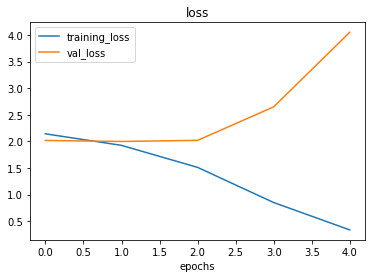

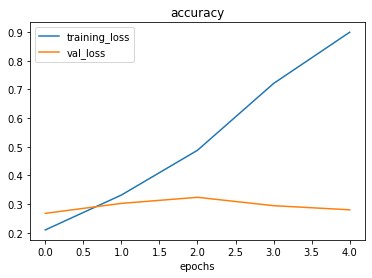

In [8]:
import matplotlib.pyplot as plt

# checking loss curves
# plotting training and validtion curve seperately
def plot_loss_curves(history):
  '''
  Returns seperate loss curves for training and validation metrics
  '''
  loss=history_6.history['loss']
  val_loss=history_6.history['val_loss']

  accuracy=history_6.history['accuracy']
  val_accuracy=history_6.history['val_accuracy']

  epochs= range(len(history_6.history['loss'])) # how many epochs 

  # plotting loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # ploting accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_loss')
  plt.plot(epochs, val_accuracy, label='val_loss')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

plot_loss_curves(history_6)

- These curves shows that our model is overfitting as it  shows great results on trtaining dataset and fails to generalize on unseen data and performs badly on test data.
- Adjust the hyperparameter to beat the baseline and reduce overfitting.
- Lets fix overfittingny:
  - Get more data: having more data give model more oppurtunity to learn diverse pattern
  - simplify the model: maybe it is the case that model is too complicated for our data, so we can try reducing the layers. # reduce nunmber of hidden units in layers
  - use data augumentation
  - use transfer learning: it leverages the patterns another model has  learned on similar data to your own and allow you to use those pattern on our data

In [9]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [10]:
# we can try removing 2 conv2D layers but there is no gurantee that it will improve the model.
# therefore we need to try and try with various parameeters.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augumented=ImageDataGenerator(rescale=1/255.,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True)

train_data_augumented=train_datagen_augumented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [11]:
# lets create another model but this time we'll fit it in the augumented training data
model_7=tf.keras.models.clone_model(model_6)

# compilee the clone mmodel 
model_7.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_7=model_7.fit(train_data_augumented,
            epochs=5,
            steps_per_epoch=len(train_data_augumented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 135s 572ms/step - loss: 2.2284 - accuracy: 0.1701 - val_loss: 2.0403 - val_accuracy: 0.2688
Epoch 2/5
235/235 [==============================] - 134s 570ms/step - loss: 2.0612 - accuracy: 0.2745 - val_loss: 1.9059 - val_accuracy: 0.3548
Epoch 3/5
235/235 [==============================] - 131s 558ms/step - loss: 1.9962 - accuracy: 0.3037 - val_loss: 1.8565 - val_accuracy: 0.3656
Epoch 4/5
235/235 [==============================] - 131s 557ms/step - loss: 1.9545 - accuracy: 0.3225 - val_loss: 1.7839 - val_accuracy: 0.3828
Epoch 5/5
235/235 [==============================] - 129s 550ms/step - loss: 1.9280 - accuracy: 0.3347 - val_loss: 1.8093 - val_accuracy: 0.3756


In [12]:
model_7.evaluate(test_data)

79/79 [==============================] - 13s 160ms/step - loss: 1.8093 - accuracy: 0.3756


[1.8092988729476929, 0.37560001015663147]

In [13]:
model_6.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 4.0519 - accuracy: 0.2800


[4.051904678344727, 0.2800000011920929]

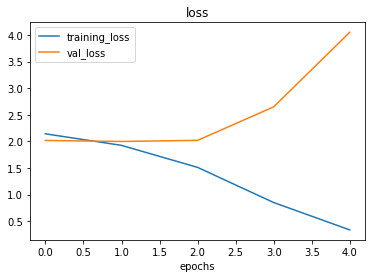

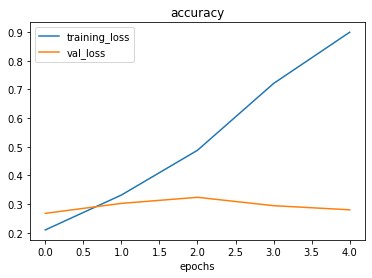

In [14]:
plot_loss_curves(history_7)

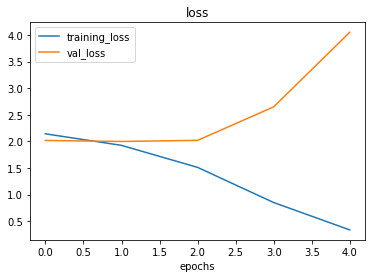

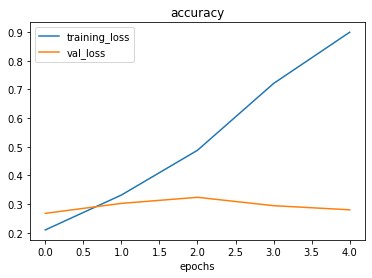

In [15]:
plot_loss_curves(history_6)

 this looks that model_7 has curves much closer than baseline modedl i.e. mdoel_6. therefore if we train for longer time we may get more improvemnet in model.

### things we can do to improve the model by running lots of experiments like:
- adjust the learning rate
- reconstructing our model ( increasing and decreasing layers and hidden units)
- try different methods of data augumentation ( adjust the hyperparameter in our ImageDataGenerator)
- training for longer
- changing optimozation functions
- use transfer learning


### making predictions: our pred_and_plot works for binary as well as multi-class

In [16]:
list(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [20]:
# create a helper function to import and load and resize it to be able to be used with 
def load_and_pre_image(filename, img_shape=224):
  '''
  read an image from filename, turn it into tensor and reshape it to (img_shape, img_shape, color channel).
  '''
  # read the image 
  img=tf.io.read_file(filename)
  # dcode the read file into tensors
  img=tf.image.decode_image(img)
  # resize the image
  img=tf.image.resize(img, size=[img_shape, img_shape])
  # rescale image and get all values between 0-1
  img=img/255.
  return img

In [21]:
def pred_and_plot(model, filename, class_names=class_names):
  '''
  import an image located at filename, makes prediction with model and plot the
  image with the predicted class as the title
  '''
  # import the target image and preprocess it
  img=load_and_pre_image(filename)

  # make prediction
  pred=model.predict(tf.expand_dims(img, axis=0))

  # we need to add logic for multi-class and get pred_class
  if len(pred[0])>1:
    pred_class=class_name[tf.argmax(pred[0])]
  else:
    pred_class=class_names[int(tf.round(pred[0]))]

  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f'prediction: {pred_class}')
  plt.axis(False)

In [18]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg

--2021-08-30 09:12:54--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg           [ <=>                ] 129.33K  --.-KB/s    in 0.08s   

2021-08-30 09:12:54 (1.67 MB/s) - ‘03-steak.jpeg’ saved [132437]

--2021-08-30 09:12:54--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg           [ <=>                ] 124.67K  --.-KB/s    in 0.08s   

2021-08-30 09:12:55 (1.62 MB/s) - ‘03-sushi.jpeg’ saved [127666]

--2021-08-30 09:12:55--  https:/

In [47]:
pred_and_plot(model_7, "03-steak.jpeg", class_names)

InvalidArgumentError: ignored

In [41]:
pred_and_plot(model=model_7,
              filename='03-sushi.jpeg',
              class_names=class_names)

InvalidArgumentError: ignored

In [44]:
pred_and_plot(model=model_7,
              filename='03-pizza-dad.jpeg',
              class_names=class_names)

InvalidArgumentError: ignored

- we can observe that our model works badly on custom data, reason may be that it has achieved 40% accuracy on test data.


In [28]:
#saving and loading the model
model_7.save('saved_trained_model_7')

INFO:tensorflow:Assets written to: saved_trained_model_7/assets


In [38]:
# loading model
loaded_model_7=tf.keras.models.load_model('saved_trained_model_7')
loaded_model_7.evaluate(test_data)

79/79 [==============================] - 13s 164ms/step - loss: 1.8093 - accuracy: 0.3756


[1.8092989921569824, 0.37560001015663147]

In [39]:
# comparing our mour model with existing model
model_7.evaluate(test_data)

79/79 [==============================] - 13s 166ms/step - loss: 1.8093 - accuracy: 0.3756


[1.8092988729476929, 0.37560001015663147]

- slightly very slightly difference this maybe because of the way computer saves the model.
- but theoritically if we see they are same thing.